# Research Question


- What area of investment was most frequently prioritized?
- Did the proportion of the total budget spent on this area influence new cases of childhood obesity between 2008 and 2018 by the local authorities that prioritised this area?

In [328]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import scipy.stats as sps

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

## LOADING DATA

In [329]:
df = pd.read_csv('coursework_1_data_2019.csv')

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

#### Adding new Columns

In [331]:
#percent spent per area
df["clean_air_percent"] = (df["clean_air"]/df["total_budget"])*100
df["clean_environ_percent"] = (df["clean_environ"]/df["total_budget"])*100
df["health_training_percent"] = (df["health_training"]/df["total_budget"])*100
df["school_awareness_percent"] = (df["school_awareness"]/df["total_budget"])*100
df["media_awareness_percent"] = (df["media_awareness"]/df["total_budget"])*100
df["sub_counselling_percent"] = (df["sub_counselling"]/df["total_budget"])*100

#number of cases per 100 people
df["cases_per_100_people_2008"] = (df["2008_cases_total"]/df["2008_pop_total"])*100
df["cases_per_100_people_2018"] = (df["2018_cases_total"]/df["2018_pop_total"])*100

#increase in number of cases per 100 people between 2008 and 2018
df["diff_in_cases_per_100_people_2008_to_2018"] = (df["cases_per_100_people_2018"]-df["cases_per_100_people_2008"])


In [332]:
df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,local_authority_type,clean_air_percent,clean_environ_percent,health_training_percent,school_awareness_percent,media_awareness_percent,sub_counselling_percent,cases_per_100_people_2008,cases_per_100_people_2018,diff_in_cases_per_100_people_2008_to_2018
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,london_borough,15.1079,15.8273,12.9496,29.4964,12.9496,13.6691,0.3434,0.4197,0.0763
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,london_borough,22.7273,7.7273,10.4545,33.6364,13.6364,11.8182,0.1583,0.2172,0.0588
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,metropolitan_borough,25.6250,28.1250,3.1250,16.2500,18.1250,8.7500,0.1588,0.2044,0.0456
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,unitary_authority,20.4969,26.0870,11.8012,31.0559,6.2112,4.3478,0.2553,0.2609,0.0056
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,unitary_authority,28.4615,40.0000,13.0769,6.1538,2.3077,10.0000,0.1966,0.2153,0.0187


In [333]:
df_report = df.head(3).append(df.tail(3))
df_report

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,local_authority_type,clean_air_percent,clean_environ_percent,health_training_percent,school_awareness_percent,media_awareness_percent,sub_counselling_percent,cases_per_100_people_2008,cases_per_100_people_2018,diff_in_cases_per_100_people_2008_to_2018
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,london_borough,15.1079,15.8273,12.9496,29.4964,12.9496,13.6691,0.3434,0.4197,0.0763
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,london_borough,22.7273,7.7273,10.4545,33.6364,13.6364,11.8182,0.1583,0.2172,0.0588
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,metropolitan_borough,25.6250,28.1250,3.1250,16.2500,18.1250,8.7500,0.1588,0.2044,0.0456
149,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,...,metropolitan_borough,8.9552,13.4328,11.4428,27.3632,24.8756,13.9303,0.6015,0.6545,0.0530
150,Worcestershire,2718,3061,3237,559135,605974,636832,978,1068,1204,...,non_metropolitan_county,27.2340,23.8298,12.1277,16.1702,14.2553,6.3830,0.4861,0.5083,0.0222
151,York,1170,1266,1414,196246,202851,212083,450,463,518,...,unitary_authority,3.5714,27.8571,5.7143,22.8571,26.4286,13.5714,0.5962,0.6667,0.0705


## Selecting Columns

In [334]:
df_selected_comparison = df[["local_authority_area","clean_air_percent","clean_environ_percent","health_training_percent","school_awareness_percent",
                 "media_awareness_percent","sub_counselling_percent","diff_in_cases_per_100_people_2008_to_2018"]]
df_selected_comparison.set_index("local_authority_area", inplace = True)
df_selected_comparison.head()
df_selected_comparison.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, Barking and Dagenham to York
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   clean_air_percent                          152 non-null    float64
 1   clean_environ_percent                      152 non-null    float64
 2   health_training_percent                    152 non-null    float64
 3   school_awareness_percent                   152 non-null    float64
 4   media_awareness_percent                    152 non-null    float64
 5   sub_counselling_percent                    152 non-null    float64
 6   diff_in_cases_per_100_people_2008_to_2018  152 non-null    float64
dtypes: float64(7)
memory usage: 9.5+ KB


## Calculating what area of investment was most frequently prioritized

In [335]:
# testing for equality
# no priority
df_equality = df_selected_comparison

# 1 = priority
# 2 = equality
df_equality_count = df_equality.eq(df_equality.max(axis=1), axis=0).sum(axis=1)
print(df_equality_count.value_counts())
print(df_equality_count[df_equality_count ==2])

1    147
2      5
dtype: int64
local_authority_area
Cumbria           2
Northumberland    2
Redbridge         2
Torbay            2
Walsall           2
dtype: int64


In [336]:
#remove rows that are equal
df_priority = df_selected_comparison.drop(["Cumbria","Northumberland","Redbridge", "Torbay","Walsall"], axis =0)

In [337]:
#get the max value of each row
df_selected_comparison_max=df_priority.idxmax(axis=1)
print(df_selected_comparison_max.value_counts())
print(df_selected_comparison_max.value_counts(normalize=True))

clean_environ_percent       65
school_awareness_percent    53
clean_air_percent           28
media_awareness_percent      1
dtype: int64
clean_environ_percent                                        0.4422
school_awareness_percent                                     0.3605
clean_air_percent                                            0.1905
media_awareness_percent                                      0.0068
dtype: float64


## Subseting

In [338]:
df_1=df_selected_comparison[df_selected_comparison["clean_environ_percent"] > df_selected_comparison["clean_air_percent"]]
#df_1.info()
df_2=df_1[df_1["clean_environ_percent"] > df_1["school_awareness_percent"]]
#df_2.info()
df_3=df_2[df_2["clean_environ_percent"] > df_2["health_training_percent"]]
#df_3.info()
df_4=df_3[df_3["clean_environ_percent"] > df_3["media_awareness_percent"]]
#df_4.info()
df_5=df_4[df_4["clean_environ_percent"] > df_4["sub_counselling_percent"]]
#df_5.info()
df_subset_cle=df_5
df_subset_cle.info()
columns=df_subset.columns
len(df_subset_cle)

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, Barnsley to York
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   clean_air_percent                          65 non-null     float64
 1   clean_environ_percent                      65 non-null     float64
 2   health_training_percent                    65 non-null     float64
 3   school_awareness_percent                   65 non-null     float64
 4   media_awareness_percent                    65 non-null     float64
 5   sub_counselling_percent                    65 non-null     float64
 6   diff_in_cases_per_100_people_2008_to_2018  65 non-null     float64
dtypes: float64(7)
memory usage: 4.1+ KB


65

## Testing for Outliers

In [339]:
df_selected.describe()

,clean_environ_percent,diff_in_cases_per_100_people_2008_to_2018
count,65.0000,65.0000
mean,33.3702,0.0404
std,5.5744,0.0236
min,20.0000,-0.0098
25%,28.8344,0.0240
50%,32.7394,0.0378
75%,36.5000,0.0546
max,45.4383,0.1014


#### Clean Environment Outliers

Text(0.5, 1.0, 'Box Plot : Testing for Outliers')

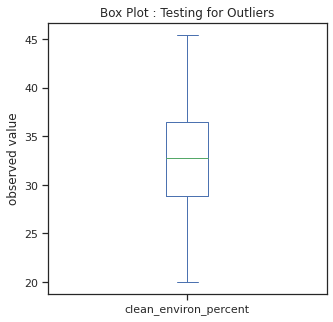

In [340]:
#Simple boxplot using pandas
sns.set(style="ticks")
sns.color_palette("magma", as_cmap=True)
plt.figure(figsize=(5, 5))
df_selected['clean_environ_percent'].plot(kind='box');
plt.ylabel('observed value')
plt.title('Box Plot : Testing for Outliers')

In [341]:
#clean environment outliers
#iqr = 36.5000 - 28.8344
#Upper fence = Q3 + (1.5 * IQR)
iqr = 7.6656
uf= 36.5000 + (1.5*7.6656)
lf= 28.8344 - (1.5*7.6656)


print(f" Upper fence is {uf} ")

df_selected[df_selected.clean_environ_percent>uf]

 Upper fence is 47.998400000000004 


,clean_environ_percent,diff_in_cases_per_100_people_2008_to_2018
local_authority_area,,


In [342]:
#Lower fence = Q1 – (1.5 * IQR).
print(f" Lower fence is {lf} ")

df_selected[df_selected.clean_environ_percent<lf]

 Lower fence is 17.336 


,clean_environ_percent,diff_in_cases_per_100_people_2008_to_2018
local_authority_area,,


#### Showing Normal Distribution

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'clean environment percent')

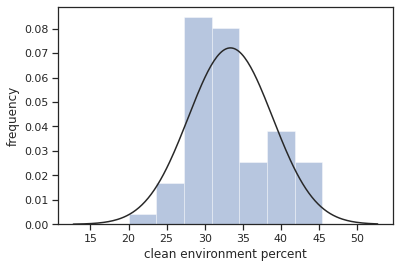

In [343]:
sns.set(style="ticks")
sns.color_palette("magma", as_cmap=True)

#old method
#sns.displot(df_selected, x="clean_environ_percent", binwidth = 1, kde = True)

cl_env_b4 = df_selected["clean_environ_percent"]

from scipy.stats import norm
ax = sns.distplot(cl_env_b4, fit=norm, kde=False)
plt.ylabel('frequency')
plt.xlabel('clean environment percent')

#### diff_in_cases_per_100_people_2008_to_2018

Text(0.5, 1.0, 'Box Plot : Testing for Outliers')

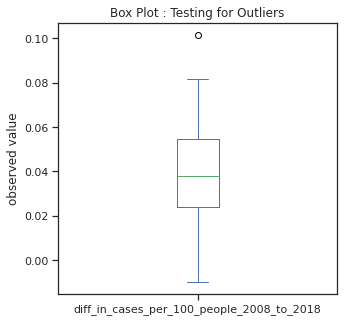

In [344]:
#Simple boxplot using pandas
plt.figure(figsize=(5, 5))
df_selected['diff_in_cases_per_100_people_2008_to_2018'].plot(kind='box');
plt.ylabel('observed value')
plt.title('Box Plot : Testing for Outliers')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency')

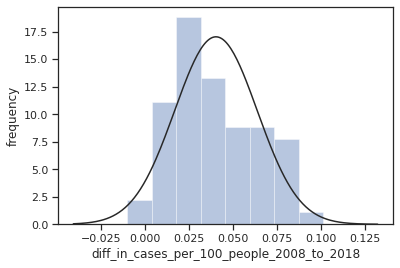

In [345]:
#old method
#sns.displot(df_selected, x="diff_in_cases_per_100_people_2008_to_2018", binwidth = 0.005, kde=True)

diff_b4 = df_selected["diff_in_cases_per_100_people_2008_to_2018"]
sns.distplot(diff_b4, fit=norm, kde=False)
plt.ylabel('frequency')

In [346]:
#diff_in_cases_per_100_people_2008_to_2018 outliers

#iqr = 0.0506 - 0.0177
#Upper fence = Q3 + (1.5 * IQR)
iqr = 0.0329
uf= 0.0506 + (1.5*0.0329)
lf= 0.0177 - (1.5*0.0329)


print(f" Upper fence is {uf} ")

df_selected[df_selected.diff_in_cases_per_100_people_2008_to_2018>uf]

 Upper fence is 0.09995 


,clean_environ_percent,diff_in_cases_per_100_people_2008_to_2018
local_authority_area,,
Hackney,26.6272,0.1014


In [347]:
#Lower fence = Q1 – (1.5 * IQR).
print(f" Lower fence is {lf} ")

df_selected[df_selected.diff_in_cases_per_100_people_2008_to_2018<lf]

 Lower fence is -0.03165 


,clean_environ_percent,diff_in_cases_per_100_people_2008_to_2018
local_authority_area,,


## Dropping Outliers

Text(0.5, 1.0, 'Scatter Plot : Testing for Outliers')

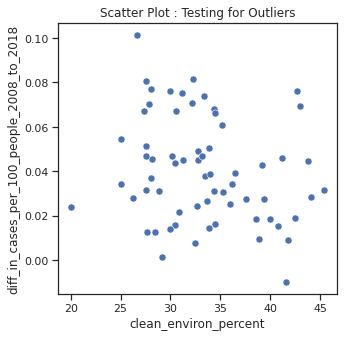

In [348]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_selected, x="clean_environ_percent", y="diff_in_cases_per_100_people_2008_to_2018",
              s=50,legend ="")
plt.title('Scatter Plot : Testing for Outliers')

In [349]:
#df_selected["clean_environ_percent"]<-21 
#==Central Bedfordshire

In [350]:
df_selected_no_outliers = df_selected.drop([ "Hackney","Central Bedfordshire"])
df_selected_no_outliers.info()
len(df_selected_no_outliers)

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, Barnsley to York
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   clean_environ_percent                      63 non-null     float64
 1   diff_in_cases_per_100_people_2008_to_2018  63 non-null     float64
dtypes: float64(2)
memory usage: 1.5+ KB


63

## NEW DISTRIBUTION

#### diff_in_cases_per_100_people_2008_to_2018

Text(0.5, 1.0, 'Box Plot : Testing for Outliers')

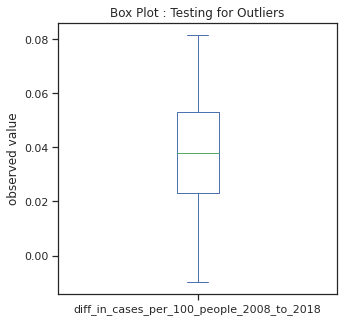

In [351]:
#Simple boxplot using pandas
plt.figure(figsize=(5, 5))
df_selected_no_outliers['diff_in_cases_per_100_people_2008_to_2018'].plot(kind='box');
plt.ylabel('observed value')
plt.title('Box Plot : Testing for Outliers')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency')

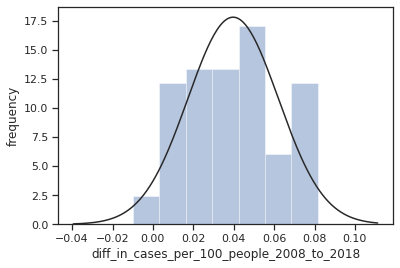

In [352]:
#sns.displot(df_selected_no_outliers, x="diff_in_cases_per_100_people_2008_to_2018", kind="kde" ,bw_adjust=2)

diff_af = df_selected_no_outliers["diff_in_cases_per_100_people_2008_to_2018"]
sns.distplot(diff_af, fit=norm, kde=False)
plt.ylabel('frequency')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency')

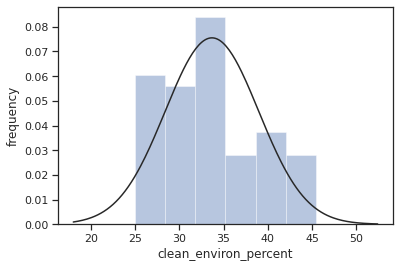

In [353]:
diff_af_clean = df_selected_no_outliers["clean_environ_percent"]
sns.distplot(diff_af_clean, fit=norm, kde=False)
plt.ylabel('frequency')

<AxesSubplot:xlabel='clean_environ_percent', ylabel='diff_in_cases_per_100_people_2008_to_2018'>

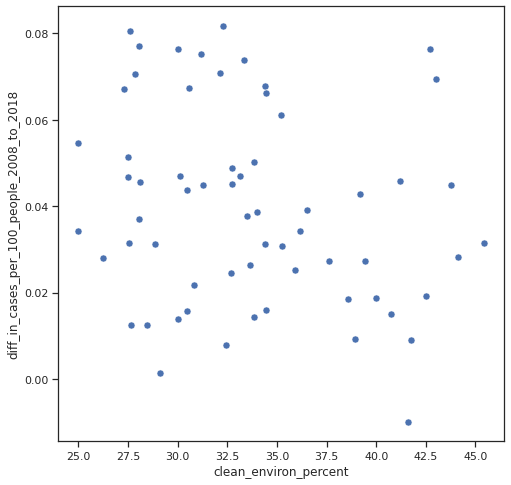

In [354]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_selected_no_outliers, x="clean_environ_percent", y="diff_in_cases_per_100_people_2008_to_2018",
              s=50,legend ="")

In [355]:
df_selected_no_outliers.describe()

,clean_environ_percent,diff_in_cases_per_100_people_2008_to_2018
count,63.0000,63.0000
mean,33.6895,0.0397
std,5.3250,0.0226
min,25.0000,-0.0098
25%,29.5652,0.0231
50%,33.1579,0.0378
75%,37.0573,0.0530
max,45.4383,0.0817


## Regression

In [356]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

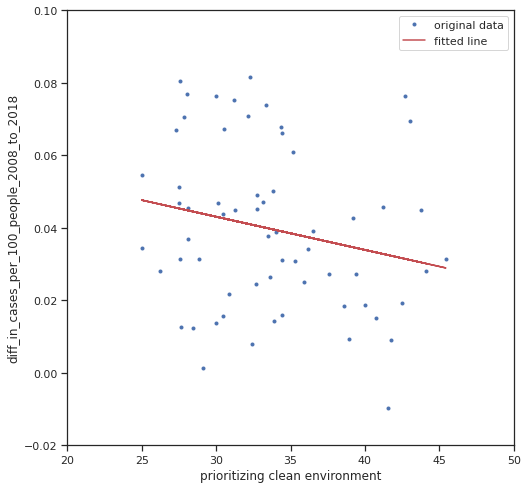

y = -0.001 x + 0.071
Rsq =  0.046546114647244216
p-value =  0.08947029287936784
                                        OLS Regression Results                                       
Dep. Variable:     diff_in_cases_per_100_people_2008_to_2018   R-squared:                       0.047
Model:                                                   OLS   Adj. R-squared:                  0.031
Method:                                        Least Squares   F-statistic:                     2.978
Date:                                       Sun, 14 Nov 2021   Prob (F-statistic):             0.0895
Time:                                               18:42:06   Log-Likelihood:                 151.38
No. Observations:                                         63   AIC:                            -298.8
Df Residuals:                                             61   BIC:                            -294.5
Df Model:                                                  1                                         
Co

In [357]:
# This is a regression of clan_env_percent against diff_in_cases_per_100_people_2008_to_2018:
# with outliers removed
plt.figure(figsize=(8, 8))
sns.set(style="ticks")
sns.color_palette("magma", as_cmap=True)
X = df_selected_no_outliers['clean_environ_percent']
Y = df_selected_no_outliers['diff_in_cases_per_100_people_2008_to_2018']

plt.xlabel('prioritizing clean environment')
plt.ylabel('diff_in_cases_per_100_people_2008_to_2018')

a = plt.plot(X,Y,'.',label='original data')
plt.xlim(20,50)
plt.ylim(-0.02,0.1)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

df_model_regression = smf.ols(formula='diff_in_cases_per_100_people_2008_to_2018 ~ clean_environ_percent',data=df_selected_no_outliers).fit()

# And this gives a big summary of the results:
print(df_model_regression.summary())

## Residual analysis

We can conduct residual analysis using 'Residual vs. Fitted plot'. 

- Independent errors
- Normally distributed errors
- Equal variance for all x values
- Outliers

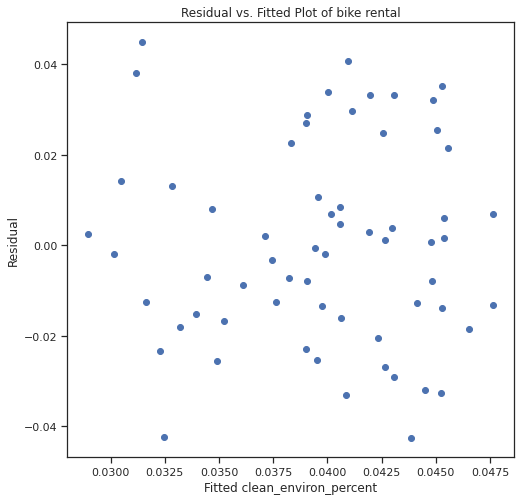

In [358]:
# plot 
plt.figure(figsize=(8, 8))
plt.scatter(df_model_regression.fittedvalues, df_model_regression.resid)
# adding title and labels
plt.xlabel('Fitted clean_environ_percent')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of bike rental')
plt.show()

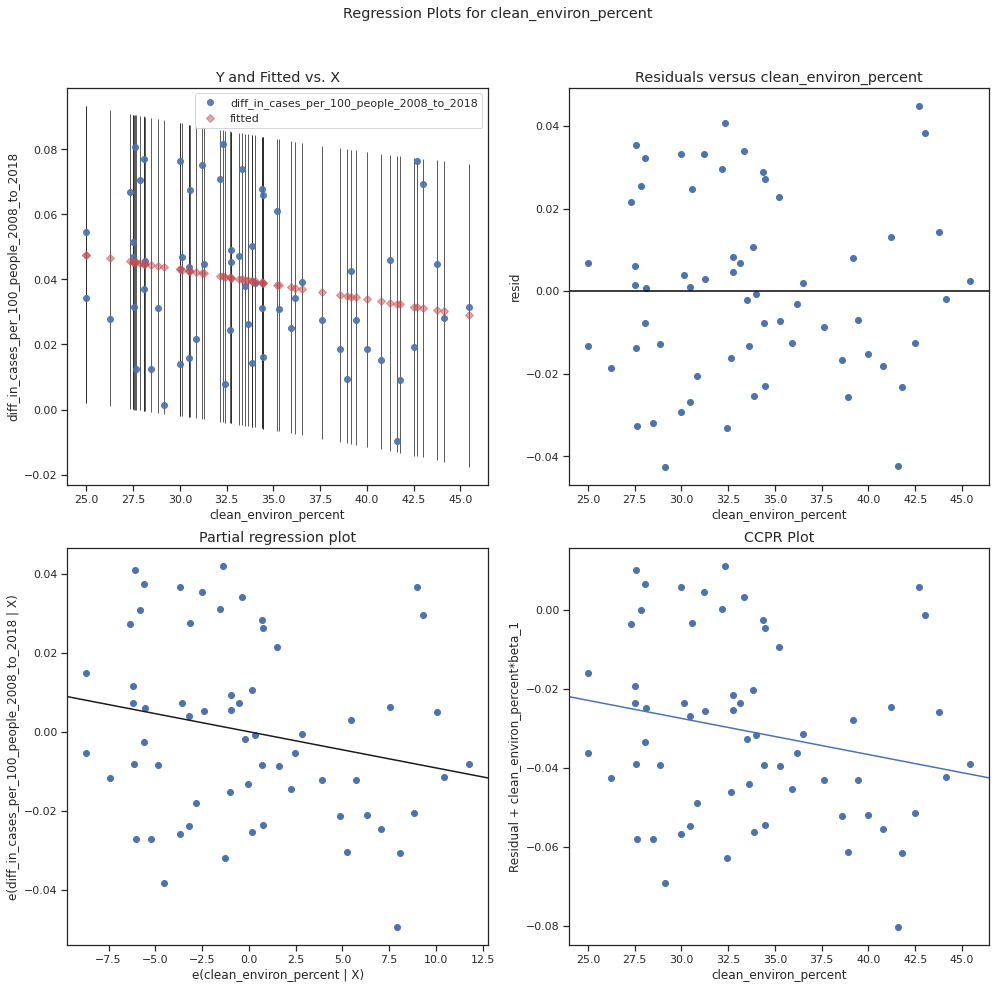

In [359]:
# produce regression plots
fig = plt.figure(figsize=(14,14))
fig = sm.graphics.plot_regress_exog(df_model_regression, 'clean_environ_percent', fig=fig)